In [36]:
import sys
sys.path.append('../')

import json
from src.lib.query_sentinel import Sentinel2Client
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
with open("keauhou_boundary.geojson") as file:
    geojson_boundary = json.load(file)

<Axes: >

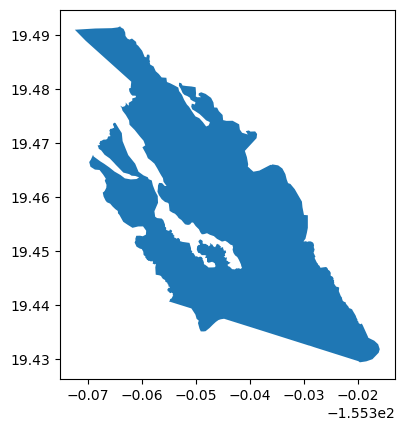

In [34]:
actual_boundary_gdf = gpd.GeoDataFrame.from_features(geojson_boundary['features'])
actual_boundary_gdf.plot()

In [66]:
buffer = .05
approx_bounding_box_geojson = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {},
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [
                            round(actual_boundary_gdf.bounds.minx[0], ndigits=4)
                            - buffer,
                            round(actual_boundary_gdf.bounds.miny[0], ndigits=4)
                            - buffer,
                        ],
                        [
                            round(actual_boundary_gdf.bounds.maxx[0], ndigits=4)
                            + buffer,
                            round(actual_boundary_gdf.bounds.miny[0], ndigits=4)
                            - buffer,
                        ],
                        [
                            round(actual_boundary_gdf.bounds.maxx[0], ndigits=4)
                            + buffer,
                            round(actual_boundary_gdf.bounds.maxy[0], ndigits=4)
                            + buffer,
                        ],
                        [
                            round(actual_boundary_gdf.bounds.minx[0], ndigits=4)
                            - buffer,
                            round(actual_boundary_gdf.bounds.maxy[0], ndigits=4)
                            + buffer,
                        ],
                        [
                            round(actual_boundary_gdf.bounds.minx[0], ndigits=4)
                            - buffer,
                            round(actual_boundary_gdf.bounds.miny[0], ndigits=4)
                            - buffer,
                        ],
                    ],
                ],
            },
        }
    ],
}

approx_bounding_box_gdf = gpd.GeoDataFrame.from_features(approx_bounding_box_geojson['features'])

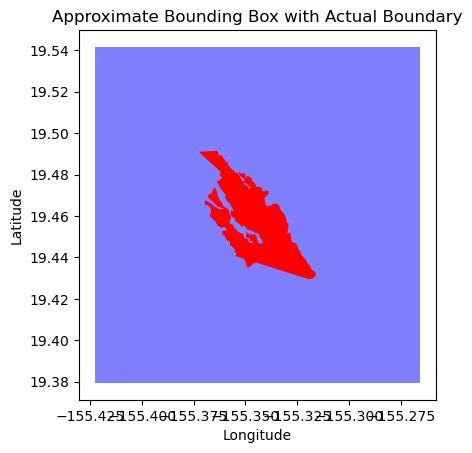

In [67]:
approx_bounding_box_gdf.plot(color='blue', alpha=0.5)
actual_boundary_gdf.plot(ax=plt.gca(), color='red')

plt.title('Approximate Bounding Box with Actual Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [28]:
# create a Sentinel2Client instance
geo_client = Sentinel2Client(geojson_boundary=approx_bounding_box_geojson, buffer=0.1)

# get imagery data before and after the fire
satellite_pass_information = geo_client.query_fire_event(
    prefire_date_range=["2018-07-21", "2018-08-05"],
    postfire_date_range=["2018-08-17", "2018-08-31"],
    from_bbox=True,
)

# calculate burn metrics
geo_client.calc_burn_metrics()

Initialized Sentinel2Client with bounds: [-155.47, 19.33, -155.22, 19.59]


/opt/conda/envs/burn-severity/lib/python3.10/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(
/opt/conda/envs/burn-severity/lib/python3.10/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(
/opt/conda/envs/burn-severity/lib/python3.10/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


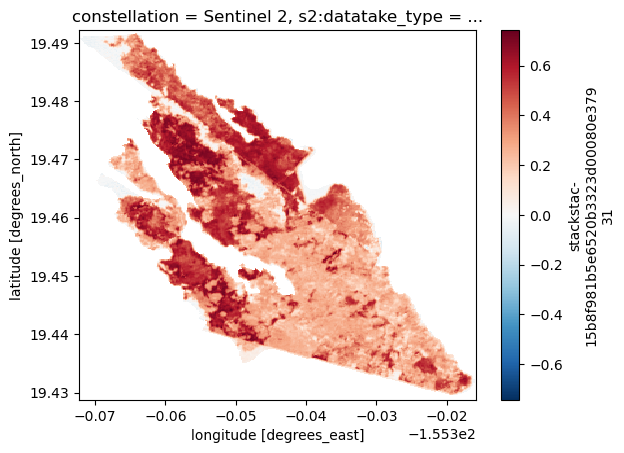

In [33]:
geo_client.metrics_stack.sel(burn_metric="rbr").plot()

In [ ]:

derived_boundary = geo_client.derive_boundary("rbr", 0.025, inplace=False)

<Axes: >

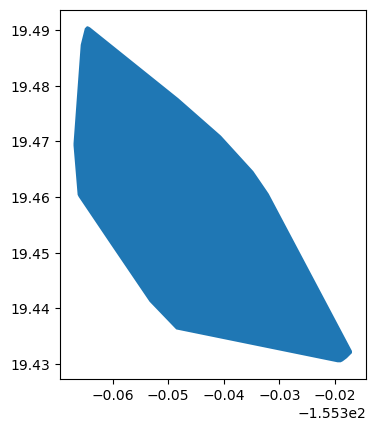

In [27]:
derived_boundary_gdf = gpd.GeoDataFrame.from_features(derived_boundary['features'])
derived_boundary_gdf.plot()